In [1]:
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.count(axis=0)

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [5]:
risk_map = {'high risk': 1, 'mid risk': 1, 'low risk': 0}
df['RiskLevel'] = df['RiskLevel'].map(risk_map)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [6]:
X = df.drop(('RiskLevel'), axis=1)  # Выбрасываем столбец 'RiskLevel'
y = df['RiskLevel']
feature_names = X.columns
print (feature_names)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

709 305


Ошибки при обучающей выборке составили: 16.22 % 
Ошибки при обучающей выборке составили: 23.28 % 

accuracy = 0.7672 precision = 0.8045 recall = 0.8 Fscore = 0.8022 roc_auc = 0.76 



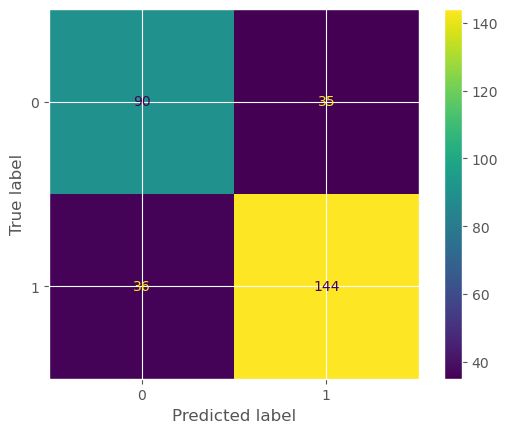

In [8]:
# kNN – метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print ('Ошибки при обучающей выборке составили:', round(err_train*100, 2), '%', '\n' 
       'Ошибки при обучающей выборке составили:', round(err_test*100, 2), '%', '\n')

accuracy = accuracy_score(y_test, knn.predict(X_test))
precision = precision_score(y_test, knn.predict(X_test))
recall = recall_score(y_test, knn.predict(X_test))
Fscore = f1_score(y_test, knn.predict(X_test))
roc_auc = roc_auc_score(y_test, knn.predict(X_test))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print('accuracy =', round(accuracy, 4), 'precision =', round(precision, 4), 'recall =', 
      round(recall, 4), 'Fscore =', round(Fscore, 4), 'roc_auc =', round(roc_auc, 4), '\n')

Ошибки при обучающей выборке составили: 5.36 % 
Ошибки при обучающей выборке составили: 12.46 % 

accuracy = 0.8754 precision = 0.8737 recall = 0.9222 Fscore = 0.8973 roc_auc = 0.8651 



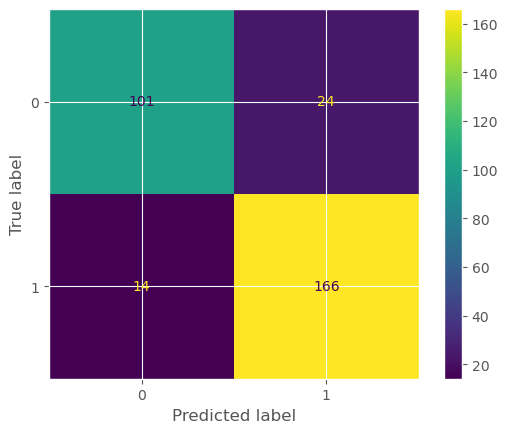

In [9]:
# Random Forest – случайный лес
from sklearn import ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print ('Ошибки при обучающей выборке составили:', round(err_train*100, 2), '%', '\n' 
       'Ошибки при обучающей выборке составили:', round(err_test*100, 2), '%', '\n')

accuracy = accuracy_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
Fscore = f1_score(y_test, rf.predict(X_test))
roc_auc = roc_auc_score(y_test, rf.predict(X_test))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print('accuracy =', round(accuracy, 4), 'precision =', round(precision, 4), 'recall =', 
      round(recall, 4), 'Fscore =', round(Fscore, 4), 'roc_auc =', round(roc_auc, 4), '\n')

Ошибки при обучающей выборке составили: 34.41 % 
Ошибки при обучающей выборке составили: 37.05 % 

accuracy = 0.6295 precision = 0.665 recall = 0.75 Fscore = 0.705 roc_auc = 0.603 



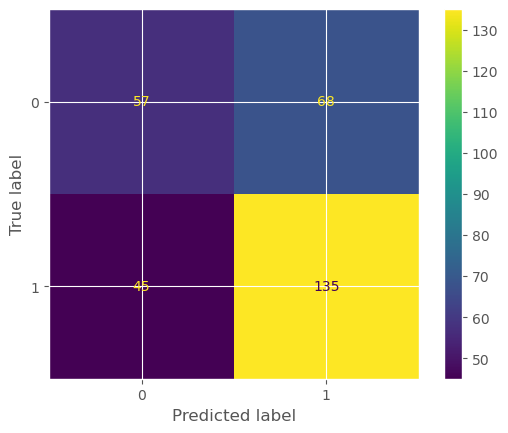

In [10]:
# SVC – машина опорных векторов
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print ('Ошибки при обучающей выборке составили:', round(err_train*100, 2), '%', '\n' 
       'Ошибки при обучающей выборке составили:', round(err_test*100, 2), '%', '\n')

accuracy = accuracy_score(y_test, svc.predict(X_test))
precision = precision_score(y_test, svc.predict(X_test))
recall = recall_score(y_test, svc.predict(X_test))
Fscore = f1_score(y_test, svc.predict(X_test))
roc_auc = roc_auc_score(y_test, svc.predict(X_test))
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print('accuracy =', round(accuracy, 4), 'precision =', round(precision, 4), 'recall =', 
      round(recall, 4), 'Fscore =', round(Fscore, 4), 'roc_auc =', round(roc_auc, 4), '\n')